# Régression

* Modéliser des relations statistiques entre deux variables

* Estimer l'impact de la variation d'une variable explicative sur une variable à expliquer

* Modèle : $y = f(x) + \epsilon$, où $x$ est une variable explicative (entrée), $y$ est une réponse (sortie) et $\epsilon$ un terme d'erreur.

Aide sur Markdown: https://colab.research.google.com/notebooks/markdown_guide.ipynb

# Partie I : Données simulées

## I.1. Régression linéaire

* $f(x) = \langle x, \beta \rangle$

* estimer le vecteur de paramètre $\beta$

a) Générer $n$ données suivant le modèle : $y_i = \beta_0 + \beta_1 x_i + \epsilon_i, i=1,\ldots,n$, avec $n=100$ et des valeurs arbitraires pour $\beta_0$ et $\beta_1$. Afficher les données.

Beta: [0.71621407 0.90199437]


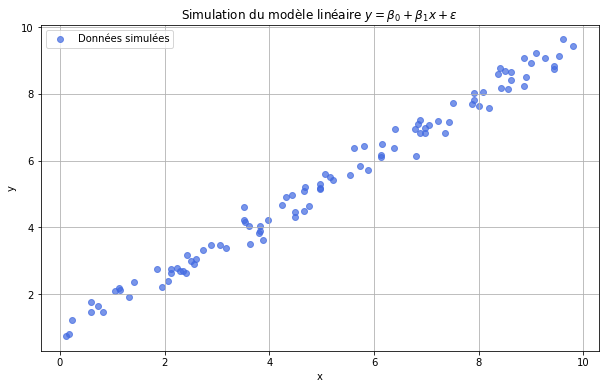

In [96]:
import numpy as np
import matplotlib.pyplot as plt

n = 100               
sigma = 0.3          
beta_ref = np.random.rand(2)  
print("Beta:", beta_ref)

x = np.random.rand(n) * 10                          
epsilon = np.random.randn(n) * sigma                
y = beta_ref[0] + beta_ref[1] * x + epsilon         

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='royalblue', alpha=0.7, label='Données simulées')
plt.title("Simulation du modèle linéaire $y = \\beta_0 + \\beta_1 x + \\epsilon$")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


b) Calculer la solution obtenue par une régression linéaire à moindres carrés. Tracer la droite de régression obtenue.

Coefficients estimés (beta0, beta1) : [0.8414752  0.87998008]


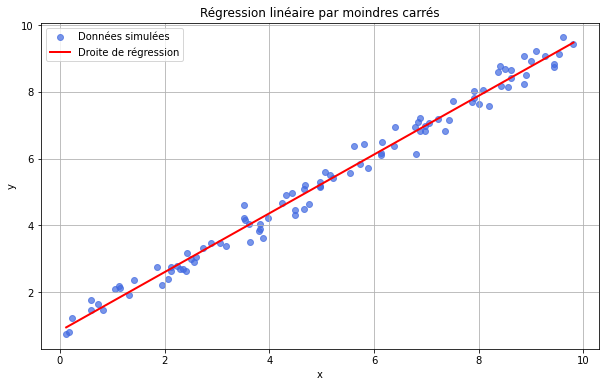

In [97]:
X = np.column_stack((np.ones(n), x))

beta_est, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)

print("Coefficients estimés (beta0, beta1) :", beta_est)

x_line = np.linspace(min(x), max(x), 100)
y_line = beta_est[0] + beta_est[1] * x_line

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='royalblue', alpha=0.7, label='Données simulées')
plt.plot(x_line, y_line, color='red', linewidth=2, label='Droite de régression')
plt.title("Régression linéaire par moindres carrés")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


## I.2. Régression non linéaire


a) Générer des données suivant le modèle : $y_i = \sin(\frac{x_i}{10}) +(\frac{x_i}{50})^2 + \epsilon $, avec $x_i = i, \forall i =1,\ldots,100$. Afficher les données.

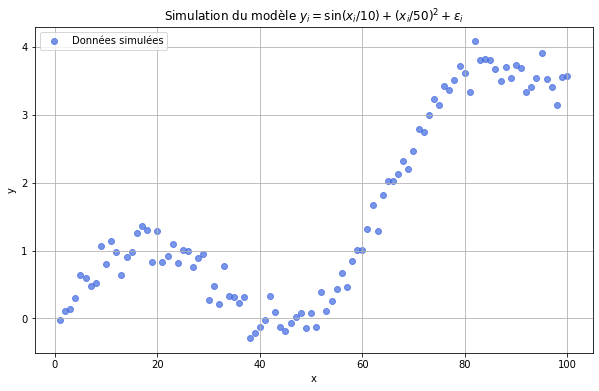

In [98]:
n = 100
sigma = 0.2  
x = np.arange(1, n+1)         
epsilon = np.random.randn(n) * sigma  
y = np.sin(x / 10) + (x / 50)**2 + epsilon 

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='royalblue', alpha=0.7, label='Données simulées')
plt.title(r"Simulation du modèle $y_i = \sin(x_i/10) + (x_i/50)^2 + \epsilon_i$")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


### I.2.1. Régression polynomiale

* $y = \beta_0 + \beta_1 x + \beta_2 x^2 +\beta_3 x^3$

* La solution d'une régression linéaire : $\hat{\beta} = (X^\top X)^{-1} X^\top Y$

* Utiliser $X = [1 \ x \ x^2 \ x^3]$


a) Ecrire une fonction qui retourne la solution de la régression linéaire multiple.

In [99]:
def regression_lineaire_multiple(X, y):
    beta_hat = np.linalg.inv(X.T @ X) @ (X.T @ y)
    return beta_hat


b) Utilisant la fonction ci-dessus, estimer les paramètres du modèle de régression polynomiale et afficher la solution.

Solution de la régression polynomiale (beta0, beta1, beta2, beta3) :
[ 1.37861274e+00 -9.29245127e-02  2.11514414e-03 -8.99313442e-06]


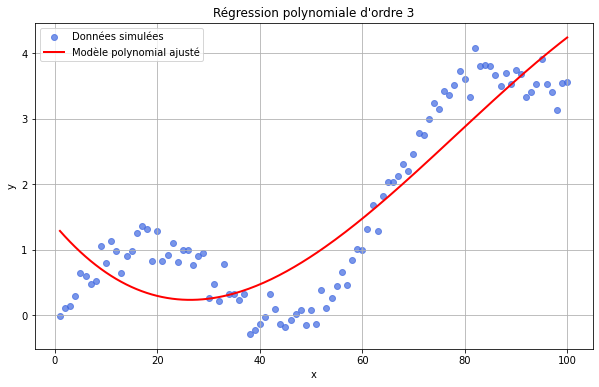

In [100]:
X = np.column_stack((np.ones(len(x)), x, x**2, x**3))

beta_hat = regression_lineaire_multiple(X, y)

print("Solution de la régression polynomiale (beta0, beta1, beta2, beta3) :")
print(beta_hat)

x_line = np.linspace(min(x), max(x), 200)
X_line = np.column_stack((np.ones(len(x_line)), x_line, x_line**2, x_line**3))
y_pred = X_line @ beta_hat

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='royalblue', alpha=0.7, label='Données simulées')
plt.plot(x_line, y_pred, color='red', linewidth=2, label='Modèle polynomial ajusté')
plt.title("Régression polynomiale d'ordre 3")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


# Partie II : Données réelles

## II.1. Récupérer et préparer les données

### II.1.1. Récupération

Vous allez travailler sur les données suivantes : https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#, et en particulier sur le fichier day.csv de ce jeu de données.



- Si vous utilisez jupyter notebook sur votre ordinateur, le jeu de données peut être chargé en utilisant la commande suivante :  `data = pd.read_csv('day.csv')` ou `data = pd.read_csv('Bike-Sharing-Dataset/day.csv')` suivant où se trouve le fichier.

- Si vous travaillez sur google colab vous devrez uploader le fichier day.csv sur votre drive et lier l'execution de votre colab notebook avec votre drive pour pouvoir ensuite y accéder comme ci dessus.

Pour lier l'execution de votre colab notebook avec votre drive il suffit d'exécuter au début de votre notebook les instructions :

```
from google.colab import drive
drive.mount('/content/drive')
```
Une fois ces instructions exécutées votre drive est accessible depuis votre notebook et vous pouvez lire ou sauvegarder dans un fichier de votre drive à partir du notebook, par exemple avec:

```
pd.read_csv(...)
```
Il vous faut cependant bien spécifier le chemin vers le fichier.





### II.1.2. Préparation

Pour préparer les données, vous éliminerez les colonnes 'instant', 'dteday', 'casual', 'registered' des données et constituerez les données d'entrée et de sortie afin de prédire la colonne 'cnt' à partir des colonnes restantes.

In [101]:
import pandas as pd

data = pd.read_csv('day.csv')
data.head()

data_clean = data.drop(columns=['instant', 'dteday', 'casual', 'registered'])

X = data_clean.drop(columns=['cnt'])

y = data_clean['cnt']


## II.2. Régression Ridge et Lasso

La régression ridge et lasso sont des extensions de la régression linéaire par moindres carrés permettant d'éviter le risque de sur-apprendtissage. L'idée est d'ajouter une pénalisation au problème de régression par moindres carrés:
$$ \arg\min_{w\in\mathbb{R}^d, b\in\mathbb{R}} \sum_{i=1}^n \big(y_i - \langle w, x_i \rangle-b\big)^2 + \lambda \Omega(w),$$
où $\lambda\in\mathbb{R}$ est un paramètre de régularisation, $\Omega(w) = \|w\|_2^2$ pour la régression ridge et $\Omega(w) = \|w\|_1$ pour le Lasso.

a) Utilisant la bibliothèque Scikit-learn, appliquez la régression Ridge et la régression Lasso sur le jeu de données "Bike Sharing". Affichez et comparez les deux solutions obtenues.

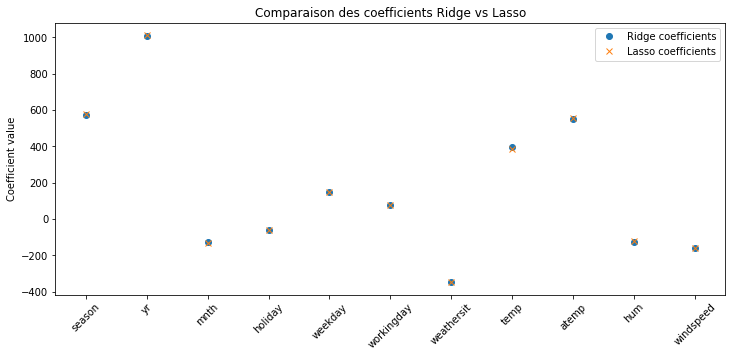

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

lasso = Lasso(alpha=0.1) 
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

coef_ridge = pd.Series(ridge.coef_, index=X.columns)
coef_lasso = pd.Series(lasso.coef_, index=X.columns)

plt.figure(figsize=(12,5))
plt.plot(coef_ridge, marker='o', linestyle='', label='Ridge coefficients')
plt.plot(coef_lasso, marker='x', linestyle='', label='Lasso coefficients')
plt.xticks(rotation=45)
plt.ylabel("Coefficient value")
plt.title("Comparaison des coefficients Ridge vs Lasso")
plt.legend()
plt.show()


b) Calculez les erreurs de prédiction sur les données d'apprentissage obtenues avec les régressions Ridge et Lasso (utiliser la valeur par défaut de Scikit-learn pour le paramètre de régularisation). Comparez les résultats avec ceux obtenus par la régression par moindre carrés.

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_train_lr = lr.predict(X_train_scaled)

y_train_ridge = ridge.predict(X_train_scaled)
y_train_lasso = lasso.predict(X_train_scaled)

def evaluate_train(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.2f}, R²: {r2:.2f}")

evaluate_train(y_train, y_train_lr, "Régression Linéaire")
evaluate_train(y_train, y_train_ridge, "Ridge")
evaluate_train(y_train, y_train_lasso, "Lasso")


Régression Linéaire - MSE: 765819.36, R²: 0.79
Ridge - MSE: 765831.54, R²: 0.79
Lasso - MSE: 765820.06, R²: 0.79


## II.2.3. Réglage des hyper paramètres par cross validation

Le choix du paramètre $\lambda$ est primordial pour avoir des résultats de prédiction optimaux. Une façon de procéder pour trouver une bonne valeur $\lambda$ est d'utiliser la méthode de cross-validation sur une grille de valeurs. Déterminer par cross-validation les valeurs de $\lambda$ permettant d'avoir les meilleurs taux de prédiction.

Vous tracerez les courbes de performance en validation (ordonnée) en fonction de $\lambda$ (abscisse) pour les modèles Ridge et Lasso.  



Meilleure lambda Ridge : 11.513953993264458
Meilleure lambda Lasso : 1.7575106248547894


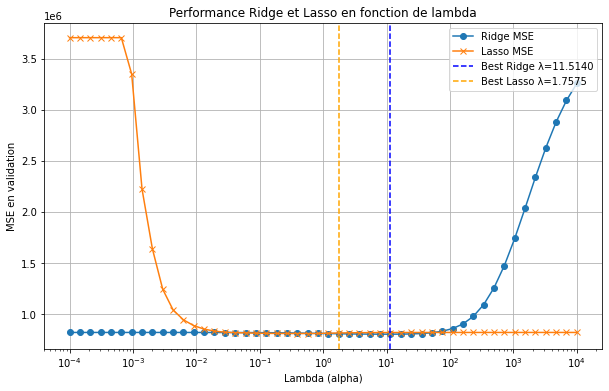

In [104]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

lambdas = np.logspace(-4, 4, 50)

mse_cv_ridge = []

for alpha in lambdas:
    ridge = Ridge(alpha=alpha)
    scores = cross_val_score(ridge, X_train_scaled, y_train, cv=5,
                             scoring=make_scorer(mean_squared_error))
    mse_cv_ridge.append(scores.mean())

best_lambda_ridge = lambdas[np.argmin(mse_cv_ridge)]
print("Meilleure lambda Ridge :", best_lambda_ridge)

lasso_cv = LassoCV(alphas=lambdas, cv=5, max_iter=10000)
lasso_cv.fit(X_train_scaled, y_train)

best_lambda_lasso = lasso_cv.alpha_
print("Meilleure lambda Lasso :", best_lambda_lasso)

mse_cv_lasso = np.mean(lasso_cv.mse_path_, axis=1)

plt.figure(figsize=(10,6))
plt.semilogx(lambdas, mse_cv_ridge, marker='o', label='Ridge MSE')
plt.semilogx(lambdas, mse_cv_lasso, marker='x', label='Lasso MSE')
plt.axvline(best_lambda_ridge, color='b', linestyle='--', label=f"Best Ridge λ={best_lambda_ridge:.4f}")
plt.axvline(best_lambda_lasso, color='orange', linestyle='--', label=f"Best Lasso λ={best_lambda_lasso:.4f}")
plt.xlabel("Lambda (alpha)")
plt.ylabel("MSE en validation")
plt.title("Performance Ridge et Lasso en fonction de lambda")
plt.legend()
plt.grid(True)
plt.show()


## II.2.4. Analyse du modèle appris

- En examinant les poids du meilleur modèle dont vous disposez, déterminez quels sont les attributs les plus importants pour la tâche de prédiction. Plus le paramètre correspondant à une colonne est petit en valeur absolue moins la caractéristique correspondante est importante.

Quelles sont les caractéristiques ayant le plus de pouvoir prédictif dans ce problème de régression ?

- Reproduisez l'ensemble de l'expérience (apprentissage, choix du meilleur modèle et analyse des paramètres de ce modèle) en normalisant **avant toute chose** les données avec un standard scaler (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

Les résultats sont-ils différents et pourquoi ?



In [105]:
from sklearn.linear_model import Ridge, Lasso

ridge_final = Ridge(alpha=11.51)
ridge_final.fit(X_train_scaled, y_train)

lasso_final = Lasso(alpha=1.76, max_iter=10000)
lasso_final.fit(X_train_scaled, y_train)

coef_ridge = pd.Series(ridge_final.coef_, index=X.columns).sort_values(key=abs, ascending=False)
coef_lasso = pd.Series(lasso_final.coef_, index=X.columns).sort_values(key=abs, ascending=False)

print("Ridge : coefficients par importance")
print(coef_ridge)

print("\nLasso : coefficients par importance")
print(coef_lasso)

Ridge : coefficients par importance
yr            991.157677
season        536.195835
atemp         500.892586
temp          440.355531
weathersit   -341.028795
windspeed    -162.138022
weekday       143.550799
hum          -126.315549
mnth          -92.690954
workingday     74.180860
holiday       -63.604050
dtype: float64

Lasso : coefficients par importance
yr            1009.658548
season         567.403388
atemp          559.797290
temp           383.811717
weathersit    -347.284906
windspeed     -159.059647
weekday        146.022613
hum           -121.494977
mnth          -120.390856
workingday      74.280204
holiday        -61.194503
dtype: float64


/home/administrateur/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/home/administrateur/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


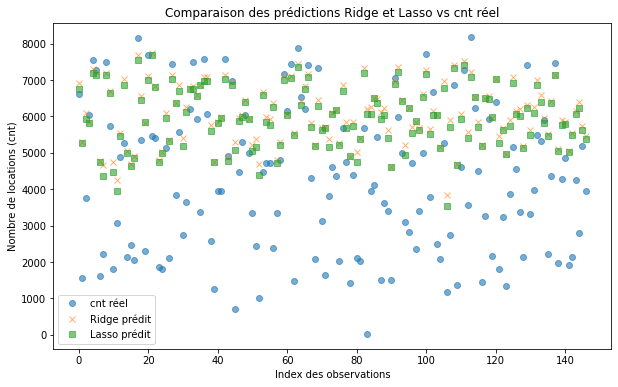

In [106]:
y_pred_ridge = ridge_final.predict(X_test)
y_pred_lasso = lasso_final.predict(X_test)

plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='cnt réel', marker='o', linestyle='', alpha=0.6)
plt.plot(y_pred_ridge, label='Ridge prédit', marker='x', linestyle='', alpha=0.6)
plt.plot(y_pred_lasso, label='Lasso prédit', marker='s', linestyle='', alpha=0.6)
plt.xlabel("Index des observations")
plt.ylabel("Nombre de locations (cnt)")
plt.title("Comparaison des prédictions Ridge et Lasso vs cnt réel")
plt.legend()
plt.show()


Meilleure lambda Ridge : 0.5689866029018293
Meilleure lambda Lasso : 0.2682695795279725


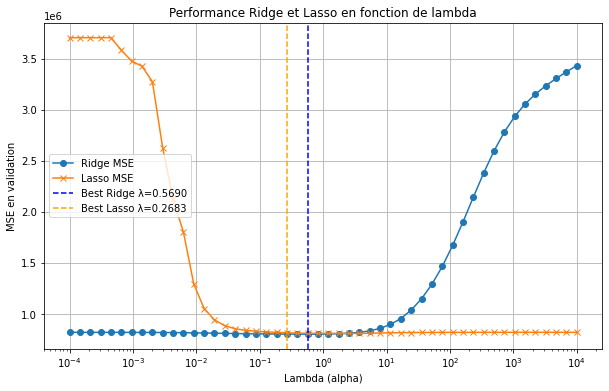


Ridge : coefficients par importance
atemp         2757.098641
temp          2643.101830
yr            2020.504440
windspeed    -1770.768251
hum           -709.484182
weathersit    -661.602378
season         534.004307
holiday       -379.689439
workingday     164.495468
weekday         73.372325
mnth           -39.170008
dtype: float64

Lasso : coefficients par importance
atemp         3426.546863
temp          2141.688318
windspeed    -2024.005450
yr            2023.830723
hum           -831.148152
weathersit    -638.019651
season         525.089038
holiday       -381.301929
workingday     160.779983
weekday         73.091457
mnth           -38.390802
dtype: float64


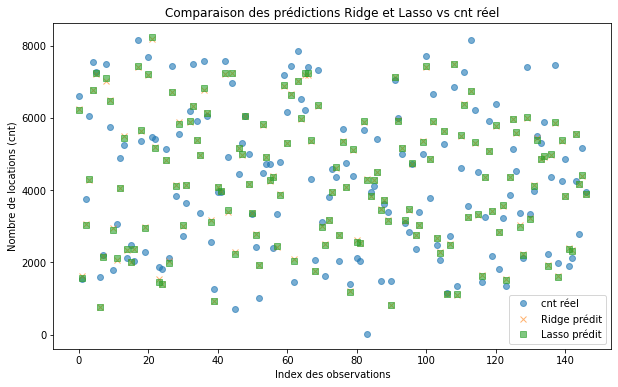

In [107]:
lambdas = np.logspace(-4, 4, 50)

mse_cv_ridge = []
for alpha in lambdas:
    ridge = Ridge(alpha=alpha)
    scores = cross_val_score(ridge, X_train, y_train, cv=5,
                             scoring=make_scorer(mean_squared_error))
    mse_cv_ridge.append(scores.mean())

best_lambda_ridge = lambdas[np.argmin(mse_cv_ridge)]
print("Meilleure lambda Ridge :", best_lambda_ridge)

lasso_cv = LassoCV(alphas=lambdas, cv=5, max_iter=10000)
lasso_cv.fit(X_train, y_train)

best_lambda_lasso = lasso_cv.alpha_
print("Meilleure lambda Lasso :", best_lambda_lasso)

mse_cv_lasso = np.mean(lasso_cv.mse_path_, axis=1)

plt.figure(figsize=(10,6))
plt.semilogx(lambdas, mse_cv_ridge, marker='o', label='Ridge MSE')
plt.semilogx(lambdas, mse_cv_lasso, marker='x', label='Lasso MSE')
plt.axvline(best_lambda_ridge, color='b', linestyle='--', label=f"Best Ridge λ={best_lambda_ridge:.4f}")
plt.axvline(best_lambda_lasso, color='orange', linestyle='--', label=f"Best Lasso λ={best_lambda_lasso:.4f}")
plt.xlabel("Lambda (alpha)")
plt.ylabel("MSE en validation")
plt.title("Performance Ridge et Lasso en fonction de lambda")
plt.legend()
plt.grid(True)
plt.show()

ridge_final = Ridge(alpha=best_lambda_ridge)
ridge_final.fit(X_train, y_train)

lasso_final = Lasso(alpha=best_lambda_lasso, max_iter=10000)
lasso_final.fit(X_train, y_train)

coef_ridge = pd.Series(ridge_final.coef_, index=X.columns).sort_values(key=abs, ascending=False)
coef_lasso = pd.Series(lasso_final.coef_, index=X.columns).sort_values(key=abs, ascending=False)

print("\nRidge : coefficients par importance")
print(coef_ridge)

print("\nLasso : coefficients par importance")
print(coef_lasso)

y_pred_ridge = ridge_final.predict(X_test)
y_pred_lasso = lasso_final.predict(X_test)

plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='cnt réel', marker='o', linestyle='', alpha=0.6)
plt.plot(y_pred_ridge, label='Ridge prédit', marker='x', linestyle='', alpha=0.6)
plt.plot(y_pred_lasso, label='Lasso prédit', marker='s', linestyle='', alpha=0.6)
plt.xlabel("Index des observations")
plt.ylabel("Nombre de locations (cnt)")
plt.title("Comparaison des prédictions Ridge et Lasso vs cnt réel")
plt.legend()
plt.show()
